### Problem 1: Distribution of Primes
The famous *Prime Number Theorem* says, among other things, that the number of prime numbers between $1$ and $N$ is roughly $\tfrac{N}{\ln(N)}$. In other words, if $\pi(N)$ is the prime counting function, 
$$
\pi(N) = \#\{p:p\text{ is prime and }1\leq p \leq N\}
$$
then 
$$
\lim_{N\to\infty}\pi(N)\frac{\ln(N)}{N} = 1.
$$

a.) 3 pts

In the code cell below, write a function which takes as input a positive integer $N$ and returns the above ratio, 
$$
\pi(N)\frac{\ln(N)}{N},
$$
as a *float*.
Hint: Sage has a builtin function to compute $\pi(N)$ which is probably much faster than what you would write; use the builtin!

In [7]:
def primeRatio(N):
    Primes = 0
    for p in range (1,N+1):
        if is_prime(p) == True:    
            Primes += 1
    return(float(Primes * (ln(N)/N)))

print(primeRatio(10000))

1.1319508317158729


Run the following code cell below to see how fast the limit converges:

In [8]:
for i in range(5,11):
    print(primeRatio(i))

0.9656627474604601
0.8958797346140275
1.111948656603036
1.0397207708399179
0.9765442565938753
0.9210340371976184


b.) 2 pts

Let $N$ be a positive integer, $N\geq 3$. Let $p$ be *the largest prime number which is smaller than $N$*. So if $N = 18$, then $p = 17$. If $N = 52$ then $p = 47$. As a function of $N$, how large would you expect the difference $N-p$ to be? Hint: Use the Prime Number Theorem and assume the prime numbers that are less than $N$ are distributed *randomly* in the interval $[1,N]$.

Your answer here: If the interval is of length $N$ and the number of primes is expected to be approximately $\frac{N}{\ln(N)}$, then the probability of a prime number occuring at any integer step within that interval is $\ln(N)$. We subtract 1 from this answer because N itself has a probability $\frac{1}{\ln(N)}$ of being prime. So the distance $N-p$ can be approximated to $\ln(N)-1$. 

c.) 2 pts

Write a function `lessPrime` which works as in 1b.). I.e. it 
- takes as input a positive integer $N\geq 3$
- returns the largest prime $p$ with $p\leq N$. 

In [18]:
def lessPrime(N):
    if N < 3: 
        return("Try a number greater or equal to 3")
    else:
        return(previous_prime(N))

Run the following to check your answer:

In [19]:
print(lessPrime(18))
print(lessPrime(52))

17
47


d.) 3 pts (2 pts for creating the plot, 1 pt for your observations)

The `randint` function is a builtin function which produces random integers. Namely, `randint(a,b)` gives a random integer selected from the range $[a,b]$ (this is one of the few functions which is inclusive on *both ends*). Using `randint`, produce a list of 1000 random integers between $10^{15}$ and $2*10^{15}$. Then:
- Create the list of tuples `[(log(i), i - lessPrime(i)) for i in randomIntegers]`
- Create the list of tuples `[(log(i), log(i)) for i in randomIntegers] `
- Using SageMath's `list_plot` function, plot *both* sets of data on a single plot (use different colors for each data set)
- Compute the average of `i-lessPrime(i)` over your list of `randomIntegers`. Compare this to `log(10^15)`. What do you think about your answer to 1c.)? Do the primes look like they are distributed randomly?

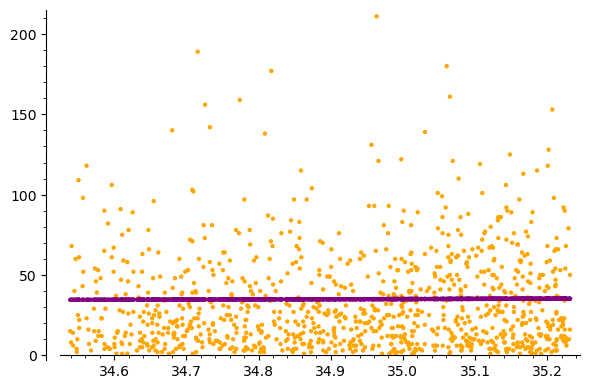

The average is:  33.009
Compare to:  34.538776394910684
These are quite close!


In [29]:
randomIntegers = [randint(10^15, 2 * 10^15) for i in range(1000)]
list1 = [(log(i), i - lessPrime(i)) for i in randomIntegers]
list2 = [(log(i), log(i)) for i in randomIntegers]
plot = list_plot(list1, color = "orange")
plot += list_plot(list2, color = "purple")
show(plot)

Average = sum([i - lessPrime(i) for i in randomIntegers])/len(randomIntegers)
print("The average is: ", float(Average))
print("Compare to: ", float(log(10^15)))
print("These are quite close!")

The average is quite close to $\log(10^{15})$, which is just as expected.

### Problem 2: Diophantine Equations
a.) 6 pts

Write a function `naiveModularSolver` which does the following:
- It takes as input a number `N` larger than 2 and a trivariate integer polynomial `f` (i.e. `f` is a polynomial in variables `x`,`y`,`z`).
- It outputs `True` or `False`, depending on whether or not `f` has a solution mod `N`.

You should do this by iterating over all possible tuples `(a,b,c)` of integers mod `N` and directly testing if this triple is a zero of `f` mod `N` (Sage *does* have various modular arithmetic solvers, but I want you to do this on your own).

In [22]:
def naiveModularSolver(f,N):
    if N <= 2:
        return("Try a number larger than 2")

    for a in range(0,N):
        for b in range(0,N):
            for c in range(0,N):
                if int(f(a,b,c))%N==0:
                    return True
    return False

To test your code, run the following code cell. The first print statement should give `True` and the second should give `False.`

In [23]:

var('x','y','z')
f(x,y,z) = x^2 + z*y + 1
g(x,y,z) = x^2 + 14*y^3 + 7*z - 12

print(naiveModularSolver(f, 3))    #This should print True
print(naiveModularSolver(g,7))     #This should print False

True
False


b.) 4 pts

Does the equation 
$$
x^2 + 14y^3 + 7z = 12
$$
have any solutions with $x,y,$ and $z$ all integers? I am looking for something that is close to a proof here, so add a bit more detail than usual:

There are no integer solutions for this equation. First, we choose an integer that divides the second and third terms ($14y^3,7z$).

Next, we take the mod7 of the whole equation, resulting in
$$
x^2mod7 + 14y^3mod7 + 7zmod7 = 12mod7
$$

$$
x^2 + 0 + 0 = 5
$$

$$
x^2 = 5
$$
Given that $x^2 = 5$ results in two solutions ($-\sqrt{5},\sqrt{5}$), neither of which is an integer, it is shown that the equation will not have any integer solutions. 

### Problem 3: Taylor series
a.) 1 pt

Instantiate a symbolic function $f$ in the code cell below, with $f(x) = \cos(x+x^2)$. (NOT a Python function; look back at Lecture 6 if you're confused)

In [4]:
f= cos(x+(x^2))
show(f)

cos(x^2 + x)

b.) 4 pts

Find the degree 1, 2, 3, and 4 Taylor expansions of $f$ around $x_0 = \pi/2$. Hint: Use the method `f.taylor(variableName, point, degree)`. The arguments can be found by running the introspection below if you want. I do not suggest printing the polynomials because they are very ugly, but you can if you want.

In [ ]:
.taylor??

In [5]:
#Code here
tay1 = f.taylor(x, pi/2, 1)
tay2 = f.taylor(x, pi/2, 2)
tay3 = f.taylor(x, pi/2, 3)
tay4 = f.taylor(x, pi/2, 4)

Run the cell below to see how good the approximations are:

In [6]:
print(float(f(pi/2+.2)))
print('*********************')
print(float(tay1(pi/2+.2)))
print(float(tay2(pi/2+.2)))
print(float(tay3(pi/2+.2)))
print(float(tay4(pi/2+.2)))

0.19290998444315385
*********************
0.022826334012656657
0.26823286185029505
0.21492025135173387
0.1924550000284141


c.) 5 pts

Using Sage's `plot` command, make *a single Sage plot on the interval $x=[0, \pi]$* showing $f(x)$ and all of the Taylor polynomials computed in 2b.). Use the following parameters to make the graph easier to view:
- Set `ymax = 2` and `ymin = -2` to make sure the scale is correct.
- Give each curve a unique color using the `color = 'YOURCOLORNAME'` command so that you can distinguish between the 5 curves
- Add a legend which labels the curve using `legend_label = 'SOMELABEL'`. For instance, a reasonable label would be `'Degree N'` for the Taylor polynomials (replacing `N` with the appropriate degree), and simply `'f(x)'` for the original function.

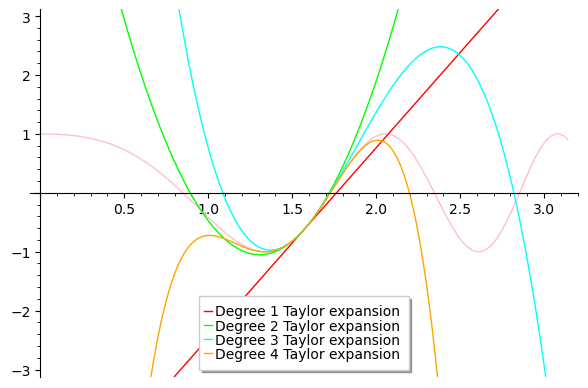

In [10]:
p = plot(f, (0,pi), ymax = 3, ymin = -3, color = "pink")
p += plot(tay1, (0,pi), ymax = 3, ymin = -3, color = "red", legend_label="Degree 1 Taylor expansion")
p += plot(tay2, (0,pi), ymax = 3, ymin = -3, color = "lime", legend_label="Degree 2 Taylor expansion")
p += plot(tay3, (0,pi), ymax = 3, ymin = -3, color = "cyan", legend_label="Degree 3 Taylor expansion")
p += plot(tay4, (0,pi), ymax = 3, ymin = -3, color = "orange", legend_label="Degree 4 Taylor expansion")
show(p)

### Problem 4: Integration Station

a.) 2 pts

Plot the ellipse $x^2 + 2y^2 = 1$ in $\mathbb{R}^2$ using Sage. Hint: You can do this in one line using Sage's `implicit_plot` function. Set `axes = True` when you call the function to give a better picture of the ellipse.

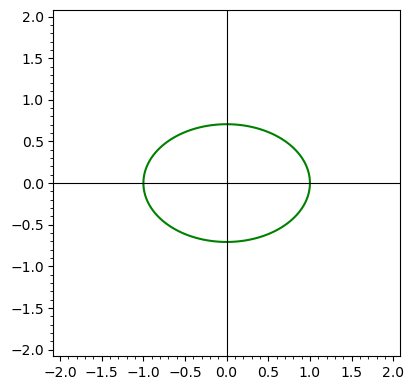

In [41]:
var('y')

implicit_plot(x^2 + 2*(y^2) -1 == 0, (-2,2), (-2,2), axes = true, color = "green")

b.) 2 pts

Write (but do not evaluate!) an integral formula in LaTex formatting which calculates the area of the set of points in the first quadrant which lie below the ellipse:
$$
\{(x,y): x\geq 0, y\geq 0, x^2 + 2y^2 \leq 1\}.
$$

INTEGRAL: $\int_{0}^{1} \sqrt{\frac{1-x^2}{2}}dx$

c.) 3 pts

Write a Sage expression to calculate the integral above. Hint: one way to do this is to use the `integrate` function twice on the symbolic function `f(x,y) = 1` to do a double integral which calculates area. The bounds for the various integrals will be given by your work in 4b.). When set up correctly, you can do this in one or two lines of code.

In [48]:
f(x) = ((1-x^2)/2)^(1/2)
show(integrate(f,x,0,1))
show(float(integrate(f,x,0,1)))

1/8*sqrt(2)*pi

0.5553603672697958

d.) 3 pts

Write one or two sentences explaining why your answer in 4c.) is correct (mathematically). Hint: what is the total area of an ellipse? How much of that area lies in one of the 4 quadrants, when the ellipse is centered at the origin? You shouldn't be doing much calculations at all; use symmetry. If you forgot your formula for the area in an ellipse, look here: https://en.wikipedia.org/wiki/Ellipse#Area .

Accor=\frac{\sqrt{2}}{2}$, and the area of an ellipse is $\pi*ab$. This means the total area is $\frac{\sqrt{2}}{2} * \pi$. Since the ellipse is symmetrical across both axes and the center, we know that the area confined in the first quadrant is equivalent to 1/4 of the total area, which is exactly what we got. 

### Problem 5: Grades!

a.) 5 pts

Write a function `grade` which does the following:
- It takes as input a *dictionary* of a student's scores in this class. So it has the following key value pairs:
    - the key `'Assignments'` has value a list `L1` with 8 numeric scores between 0 and 100
    - the key `'Quizzes'` has value a list `L2` with 2 numeric scores between 0 and 100
    - the key `'Participation'` has value a list `L3` with 25 binary values (i.e. either 0 or 1)
    - the key `'Final Project'` has value a list `L4` with a single numeric score between 0 and 100.
- The output of this function is the student's adjusted total score (out of 100) for this class. This should return a *float* (not a fraction).

Hint: If you sort a list it becomes easy to find the maximum `k` elements of that list. Check out Python's `sorted()` function.

Feel free to use this function throughout the quarter for yourself!

In [18]:
def grade(dictionary):

    drop = sorted(dictionary['Assignments'])
    adjusted = drop[2:8]
    Assignment = (sum(adjusted)/6)*.6
    Quiz = (sum(dictionary['Quizzes'])/2)*.12
    Final = (sum(dictionary['Final Project'])/1)*.2
    Participating = (100 * sum(dictionary['Participation'])/25)*.08

    finalgrade = float(Assignment + Quiz + Final + Participating)
    return finalgrade

Evaluate the code below to test your answer:

In [19]:
myGrades = {'Assignments':[94,91,82,75,61,0,92,99],'Quizzes':[84,89],'Participation':[1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1],'Final Project':[92]}
print(grade(myGrades))

86.88


b.) 5 pts

In the code cell below there is a dictionary `gradeDict` which has "grades" for 100 made up students. Each student has an ID (a number between 0 and 99). To access the grades for student `j`, you call `gradeDict[j]` . This leaves you with a student specific grade dictionary as in part a.) of this problem. Do the following:
- Create a list `L` of final grades, where `L[j]` has the final grade of student `j`. 
- Using a histogram with 10 bins, plot the distribution of grades in this made up class. 

NOTE: Everyone will have slightly different histograms, as I am generating the grades completely randomly. But your code will essentially be the same. Sage has multiple methods to plot histograms. The `histogram` function (lowercase h!) described here will work https://doc.sagemath.org/html/en/reference/plotting/sage/plot/histogram.html (but note you have to make an import statement!)

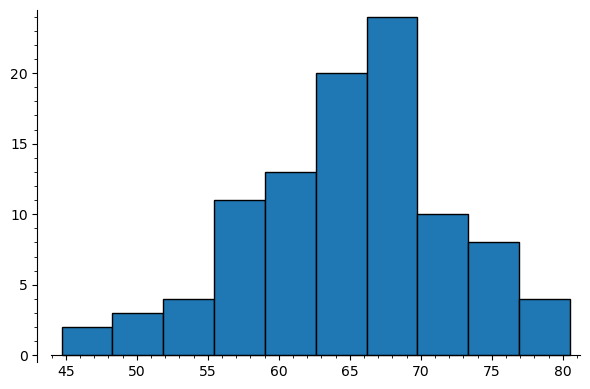

In [20]:
gradeDict = {i:{'Assignments':[randint(0,100) for _ in range(8)],'Quizzes':[randint(20,100), randint(40,100)],
                'Participation':[randint(0,1) for _ in range(25)], 'Final Project':[randint(50,100)]} for i in range(100)}

L = [grade(gradeDict[k]) for k in range(0,99)]
show(histogram(L,bins = 10))
